In [84]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

# Open the ROOT file and get the TTree
file = uproot.open("dati/compton/high/Hits.root")
tree = file["Hits"]

# Get the data as a Pandas DataFrame
data = tree.arrays(library="pd")

# Define the processes of interest
process_names = ["annihil", "eBrem","phot","compt"]

# Create dictionaries to store data for these processes
process_energy_spectra = {}
process_positions = {}
process_TOF = {}

# Initialize background data for eBrem
background_energy = None
background_positions = None
background_TOF = {}

for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="gamma"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    if process_name == "eBrem":
        # Store eBrem data as background
        background_energy = energies
        background_positions = positions
        background_TOF = TOF

    if process_name=="annihil":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
    

        


# Plot energy spectra for eBrem as background
min_value = min(background_energy.min(), process_energy_spectra["annihil"].min())
#max_value = max(background_energy.max(), process_energy_spectra["annihil"].max())

max_value = 20

num_bins = 350  # Adjust as needed
bin_edges = np.linspace(min_value, max_value, num=num_bins)

#plt.figure(figsize=(12, 6))
#plt.yscale('log')
#if background_energy is not None:
#    plt.hist(background_energy, bins=bin_edges, label="eBrem", alpha=0.7,  color="gray",range=(0, 20)) 
#    #plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
#    #plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")
#
#       
#if "annihil" in process_energy_spectra:
#    plt.hist(process_energy_spectra["annihil"], bins=bin_edges, label="annihil", alpha=0.7, color="blue",range=(0, 20))
#plt.xlabel("Energy (MeV)")
#plt.ylabel("Counts")
#plt.title("Energy Spectra for Annihil with eBrem Background")
#plt.legend()
#plt.show()
#


for process_name in process_names:
    process_data = data[data["processName"] == process_name]

    process_data=process_data[process_data["particleName"]=="e-"]
    energies = process_data["energy"]
    positions=(process_data["z"])/(process_data["y"])
    TOF = process_data["TOF"]

    
    if process_name=="phot":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
    if process_name=="compt":
        process_energy_spectra[process_name] = energies
        process_positions[process_name] = positions
        process_TOF[process_name] = TOF
        
        
        
#plt.figure(figsize=(12, 6))
#plt.yscale('log')
#
#plt.hist(process_energy_spectra["phot"], bins=100, label="phot", alpha=0.7,  color="red")
#plt.hist(process_energy_spectra["compt"], bins=100, label="compt", alpha=0.7,  color="green")
#
#
#plt.xlabel("Energy (MeV)")
#plt.ylabel("Counts")
#plt.title("Energy Spectra for Electrons")
#plt.legend()
#plt.show()
#

# Plot cylindrical positions for eBrem as background
#if background_positions is not None:
#    plt.hist(background_positions, bins=60, label="eBrem", alpha=0.7, color="gray",range=(-3, 3))
#if "annihil" in process_positions:
#    plt.hist(process_positions["annihil"], bins=60, label="annihil", alpha=0.7, color="blue",range=(-3, 3))
#plt.xlabel("Cylindrical Position (mm)")
#plt.ylabel("Counts")
#plt.title("Cylindrical Position for Annihil with eBrem Background")
#plt.legend()
#
#plt.tight_layout()
#plt.show()
#
## Perform TOF analysis for annihil and eBrem
#if background_TOF is not None:
#    plt.hist(background_TOF, bins=100, label="eBrem", alpha=0.7, color="gray")
#
#
#if "annihil" in process_TOF:
#    plt.hist(process_TOF["annihil"], bins=100, label="annihil", alpha=0.7, range=(0, 10))
#    plt.xlabel("Time of Flight (ns)")
#    plt.ylabel("Counts")
#    plt.title("Time of Flight for Annihil and eBrem")
#    plt.legend()
#
#plt.show()

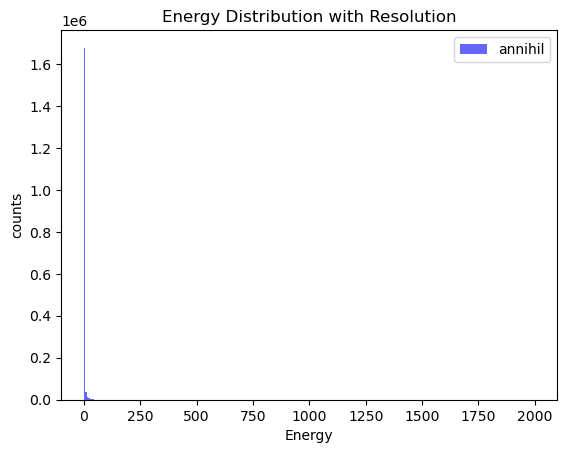

In [85]:
perfect_energies = data["energy"]

# Parameters for the energy resolution Gaussian distribution
mean_resolution = 0  # Mean of the resolution
std_resolution = 0.15  # Standard deviation of the resolution (adjust as needed)

# Create an array of energies with energy resolution
energies_with_resolution = np.concatenate([np.random.normal(energy, std_resolution*energy,size=100) for energy in perfect_energies])

# Plot the histogram
plt.hist(perfect_energies, bins=300, density=False, alpha=0.6, color='blue', label='annihil',range=(0,2000))
plt.xlabel('Energy')
plt.ylabel('counts')
plt.title('Energy Distribution with Resolution')
plt.legend()
plt.show()

prendere posizioni su abs e scatt e creare asse cono

In [86]:
import pandas as pd
data["energy"]=data["energy"]*1000
# Read CSV file into a DataFrame
csv_file_path = 'dati/compton/gamma_entering_particles.csv'
df_csv = pd.read_csv(csv_file_path, delimiter=',', header=None, names=['Energy_csv', 'X_csv', 'Y_csv', 'Z_csv', 'evt'])
df_csv['Energy_csv'] = df_csv['Energy_csv']/100

# Filter rows where energy is greater than zero
filtered_csv = df_csv[df_csv['Energy_csv'] > 0]
#filtered_csv = df_csv

# Filter rows in the DataFrame based on Event column
filtered_dataframe = data[data['evt'].isin(filtered_csv['evt'])]

# Display the filtered DataFrame
print(filtered_dataframe)

                x          y      z       energy       TOF particleName  \
0      102.017142 -82.404142  299.0   510.998910  3.270289        gamma   
1        3.837978 -10.291620  299.0    48.949347  3.809589        gamma   
5      -65.020828  -5.303188  299.0   123.697760  3.264101        gamma   
6       14.795256 -16.899322  299.0  2116.035508  3.825038        gamma   
12     147.419285 -76.965055  299.0   602.898935  3.127387        gamma   
...           ...        ...    ...          ...       ...          ...   
17235   84.673976 -69.556269  299.0    91.008166  4.282199        gamma   
17236  102.941509  45.879451  299.0   510.998910  3.392803        gamma   
17237  118.380209  75.597812  299.0   957.341907  3.644256        gamma   
17247 -145.961343 -99.618711  299.0  8853.674861  3.938458        gamma   
17249  -78.485026   3.870537  299.0   116.158264  3.615101        gamma   

      processName    evt  parentID  
0         annihil      5        34  
1           eBrem      5 

In [87]:
merged_df = pd.merge(filtered_csv, data, on='evt', suffixes=('_csv', '_df'))

# Calculate theta for each row
mec_square = (511)
merged_df['E_sum'] = merged_df['Energy_csv'] + merged_df['energy']
merged_df['Theta'] = np.arccos(1 - (mec_square*((1/(merged_df['energy'])) - (1/(merged_df['E_sum'])))))

# Display the updated DataFrame with the calculated theta
print(merged_df[['evt', 'X_csv', 'Y_csv', 'Z_csv', 'Energy_csv', 'x', 'y', 'z', 'energy', 'Theta',"E_sum","processName"]])

        evt     X_csv      Y_csv  Z_csv  Energy_csv           x          y  \
0         5  146.8960  26.095900  190.0    4.616690  102.017142 -82.404142   
1         5  146.8960  26.095900  190.0    4.616690    3.837978 -10.291620   
2        35   21.2263  86.581900  190.0    0.163618  -65.020828  -5.303188   
3        38  -77.0344 -31.437200  190.0    0.387428   14.795256 -16.899322   
4        74   63.3519  -2.488860  190.0    0.087446  147.419285 -76.965055   
...     ...       ...        ...    ...         ...         ...        ...   
6896  99872   71.2989 -28.762100  190.0    0.000240   84.673976 -69.556269   
6897  99875   76.2879   0.014709  190.0    0.141855  102.941509  45.879451   
6898  99875   76.2879   0.014709  190.0    0.141855  118.380209  75.597812   
6899  99948  -87.2245  20.495600  190.0    0.024255 -145.961343 -99.618711   
6900  99964  -86.2840 -16.153300  190.0    0.015941  -78.485026   3.870537   

          z       energy     Theta        E_sum processName  
0

In [88]:
df_csv_position = merged_df[['X_csv', 'Y_csv', 'Z_csv']].values
df_dataframe_position = merged_df[['x', 'y', 'z']].values

direction_vector = df_dataframe_position - df_csv_position
normalized_direction = direction_vector / np.linalg.norm(direction_vector, axis=1)[:, np.newaxis]

# Add direction columns to the DataFrame
merged_df['Direction_X'] = normalized_direction[:, 0]
merged_df['Direction_Y'] = normalized_direction[:, 1]
merged_df['Direction_Z'] = normalized_direction[:, 2]

# Display the updated DataFrame
print(merged_df[['evt', 'X_csv', 'Y_csv', 'Z_csv', 'Energy_csv', 'x', 'y', 'z', 'energy', 'Theta',"E_sum","processName", 'Direction_X', 'Direction_Y', 'Direction_Z']])

        evt     X_csv      Y_csv  Z_csv  Energy_csv           x          y  \
0         5  146.8960  26.095900  190.0    4.616690  102.017142 -82.404142   
1         5  146.8960  26.095900  190.0    4.616690    3.837978 -10.291620   
2        35   21.2263  86.581900  190.0    0.163618  -65.020828  -5.303188   
3        38  -77.0344 -31.437200  190.0    0.387428   14.795256 -16.899322   
4        74   63.3519  -2.488860  190.0    0.087446  147.419285 -76.965055   
...     ...       ...        ...    ...         ...         ...        ...   
6896  99872   71.2989 -28.762100  190.0    0.000240   84.673976 -69.556269   
6897  99875   76.2879   0.014709  190.0    0.141855  102.941509  45.879451   
6898  99875   76.2879   0.014709  190.0    0.141855  118.380209  75.597812   
6899  99948  -87.2245  20.495600  190.0    0.024255 -145.961343 -99.618711   
6900  99964  -86.2840 -16.153300  190.0    0.015941  -78.485026   3.870537   

          z       energy     Theta        E_sum processName  Di

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


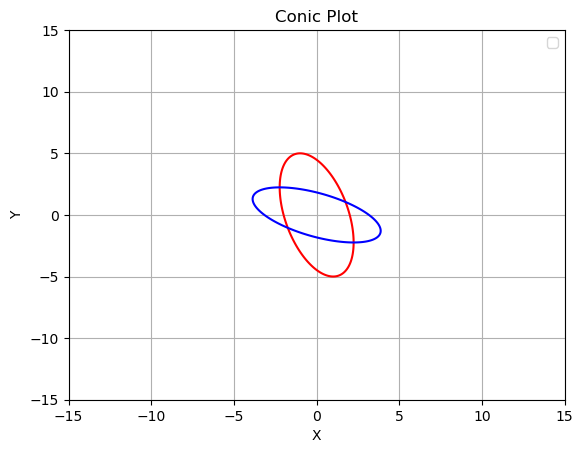

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for multiple conics
conics_params = [
    {"center": (0, 0, 0), "coefficients": (1, 0, 1), "angle": np.pi/3, "zp": 0, "color": 'r', "label": 'Conic 1'},
    {"center": (0, 0, 0), "coefficients": (0, 1, -1), "angle": np.pi/4, "zp": 0, "color": 'b', "label": 'Conic 2'},
    # Add more conics with their parameters as needed
]

# Generate X and Y values
X = np.linspace(-15, 15, 1000)
Y = np.linspace(-15, 15, 1000)
X, Y = np.meshgrid(X, Y)

# Plot the conics using a for loop
for conic_params in conics_params:
    x, y, z = conic_params["center"]
    n1, n2, n3 = conic_params["coefficients"]
    theta = conic_params["angle"]
    zp = conic_params["zp"]

    # Conic equation
    equation = ((n1 * (X - x) + n2 * (Y - y) + n3 * (zp - z))**2) + (np.cos(theta)**2) * ((X - x) + (Y - y) + (zp - z))**2

    # Plot the conic
    plt.contour(X, Y, equation, levels=[5], colors=conic_params["color"])

# Additional plot settings
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conic Plot')
plt.grid(True)
plt.legend()
plt.show()




/tmp/ipykernel_304555/2263520230.py:37: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, equation,levels=[10])


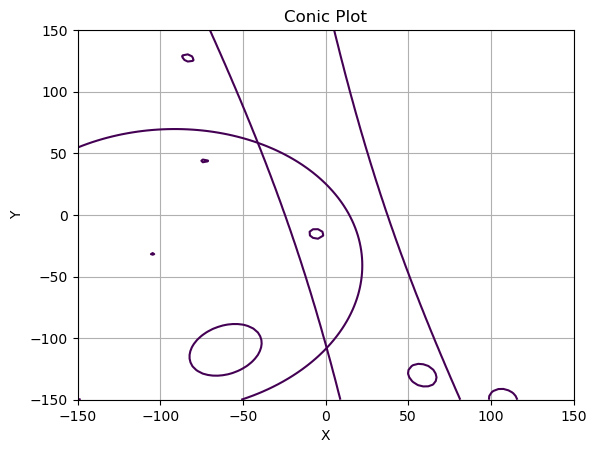

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming merged_df is the DataFrame containing the direction information
# ...

def plot_conics(merged_df, num_conics):
    # Define the parameters for multiple conics
    conics_params = []

    # Assuming 'direction' is the column name in merged_df containing the direction as a tuple (X, Y, Z)
    for index, row in merged_df.iterrows():
        direction = (row['Direction_X'], row['Direction_Y'], row['Direction_Z'])
        angle = row['Theta']
        center = (row['X_csv'], row['Y_csv'], row['Z_csv'])

        # Add conic parameters
        conic_params = {"center": center, "coefficients": direction, "angle": angle, "zp": 0, "color": 'r'}
        conics_params.append(conic_params)

    # Generate X and Y values
    X = np.linspace(-150, 150, 100)
    Y = np.linspace(-150, 150, 100)
    X, Y = np.meshgrid(X, Y)

    # Plot the conics using a for loop
    for conic_params in conics_params[:num_conics]:
        x, y, z = conic_params["center"]
        n1, n2, n3 = conic_params["coefficients"]
        theta = conic_params["angle"]
        zp = conic_params["zp"]

        # Conic equation
        equation = ((n1 * (X - x) + n2 * (Y - y) + n3 * (zp - z))**2) - (np.cos(theta)**2) * ((X - x)**2 + (Y - y)**2 + (zp - z)**2)

        # Plot the conic
        plt.contour(X, Y, equation,levels=[10])

    # Additional plot settings
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Conic Plot')
    plt.grid(True)
    plt.show()

# Specify the number of conics to draw
num_conics_to_draw = 30  # Adjust as needed
plot_conics(merged_df, num_conics_to_draw)

/tmp/ipykernel_304555/2263520230.py:37: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, equation,levels=[10])


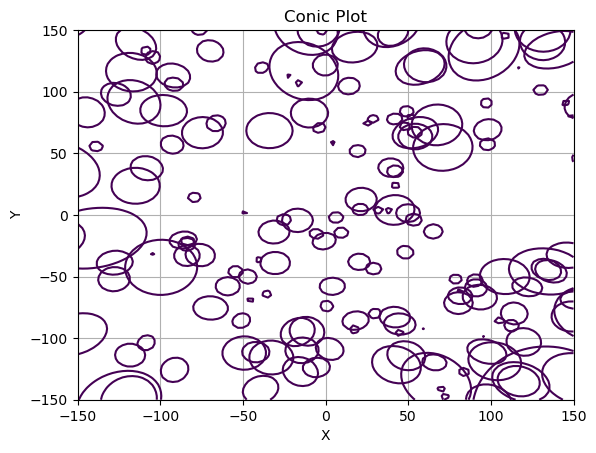

In [91]:


# Filter rows where processName is "annihil"
filtered_df = merged_df[merged_df['processName'] == 'annihil']

num_conics_to_draw = 1000  # Adjust as needed
plot_conics(filtered_df, num_conics_to_draw)



/tmp/ipykernel_304555/2263520230.py:37: UserWarning: No contour levels were found within the data range.
  plt.contour(X, Y, equation,levels=[10])


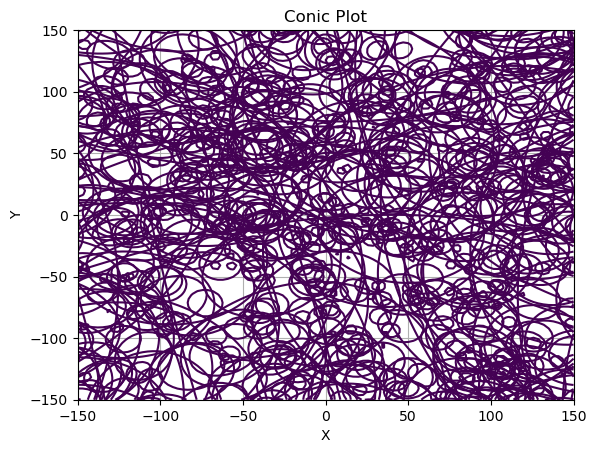

In [92]:

# Filter rows where processName is "annihil"
filtered_df1 = merged_df[merged_df['processName'] == 'eBrem']

num_conics_to_draw = 3000  # Adjust as needed
plot_conics(filtered_df1, num_conics_to_draw)


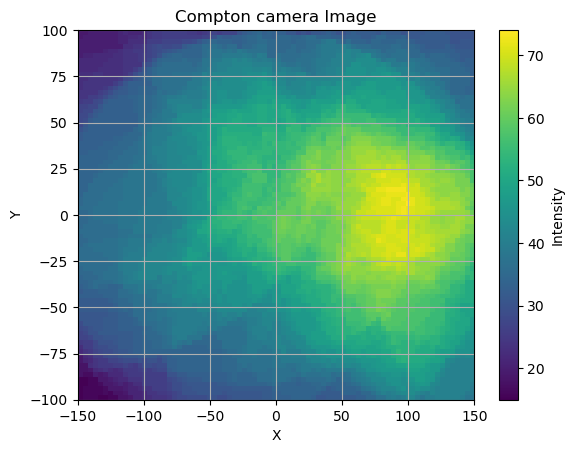

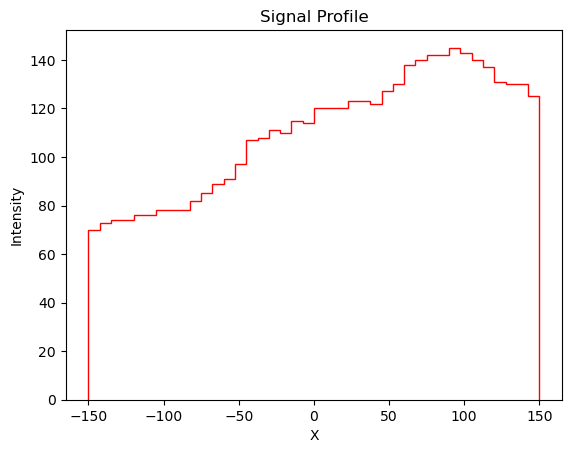

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is the DataFrame containing the direction information
# ...

ximg=np.linspace(-150,150,80)
def plot_conics(merged_df, num_conics):
    # Define the parameters for multiple conics
    conics_params = []

    # Assuming 'direction' is the column name in merged_df containing the direction as a tuple (X, Y, Z)
    for index, row in merged_df.iterrows():
        direction = (row['Direction_X'], row['Direction_Y'], row['Direction_Z'])
        angle = row['Theta']
        center = (row['X_csv'], row['Y_csv'], row['Z_csv'])

        # Add conic parameters
        conic_params = {"center": center, "coefficients": direction, "angle": angle, "zp": -50, "color": 'r'}
        conics_params.append(conic_params)

    # Generate X and Y values
    X = np.linspace(-200, 200, 80)
    Y = np.linspace(-200, 200, 80)
    X, Y = np.meshgrid(X, Y)

    # Create an empty 2D array to store density values
    density_map = np.zeros_like(X)

    # Iterate for all the curves and update density_map
    for conic_params in conics_params[:num_conics]:
        x, y, z = conic_params["center"]
        n1, n2, n3 = conic_params["coefficients"]
        theta = conic_params["angle"]
        zp = conic_params["zp"]

        # Conic equation
        equation = ((n1 * (X - x) + n2 * (Y - y) + n3 * (zp - z))**2) - (np.cos(theta)**2) * ((X - x)**2 + (Y - y)**2 + (zp - z)**2)

        # Update density_map
        density_map += np.isclose(equation,0,atol=50000).astype(int)
    # Plot the 2D density map
    plt.imshow(density_map, extent=[-150, 150, -100, 100], origin='lower', cmap='viridis', interpolation='nearest', aspect='auto')

    # Additional plot settings
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Compton camera Image')
    plt.colorbar(label='Intensity')
    plt.grid(True)
    plt.show()

    plt.hist(ximg,weights=density_map[40,:], bins=40, range=(-150, 150), histtype='step', color='r')
    plt.xlabel('X')
    plt.ylabel('Intensity')
    plt.title('Signal Profile')



# Specify the number of conics to draw
num_conics_to_draw = 100  # Adjust as needed
plot_conics(merged_df, num_conics_to_draw)


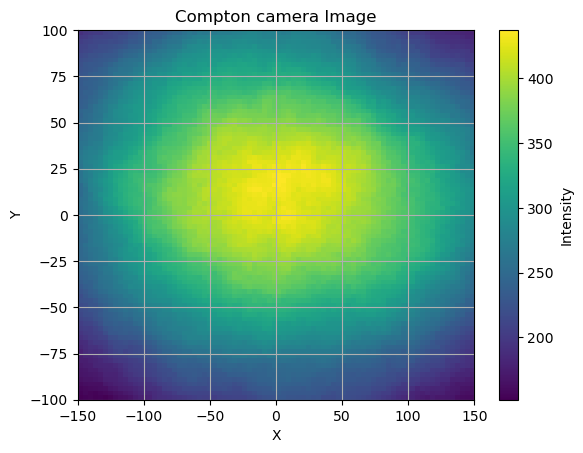

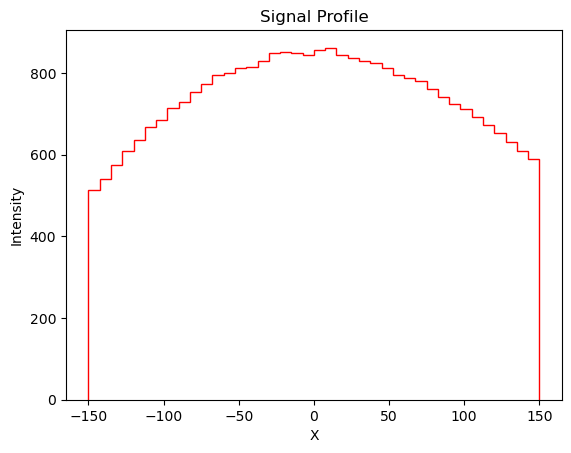

In [94]:


# Filter rows where processName is "annihil"
filtered_df = merged_df[merged_df['processName'] == 'annihil']

num_conics_to_draw = 10000000  # Adjust as needed
plot_conics(filtered_df, num_conics_to_draw)


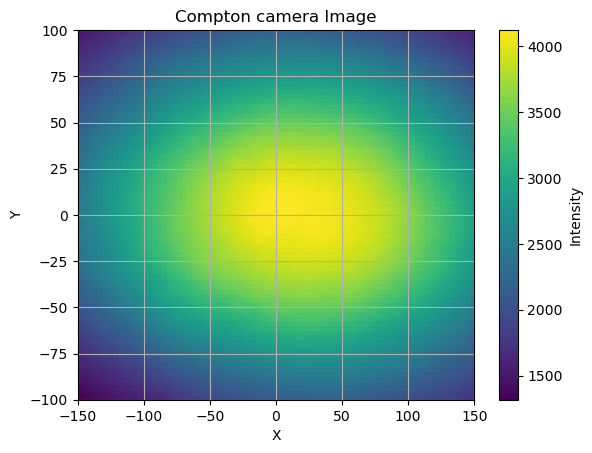

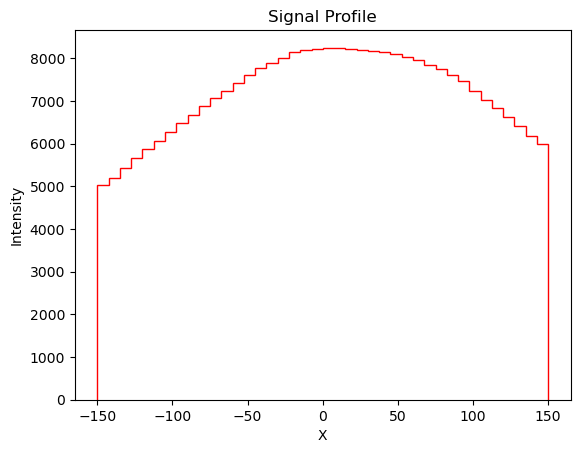

In [95]:

# Filter rows where processName is "annihil"
filtered_df1 = merged_df[merged_df['processName'] == 'eBrem']

num_conics_to_draw = 10000000  # Adjust as needed
plot_conics(filtered_df1, num_conics_to_draw)

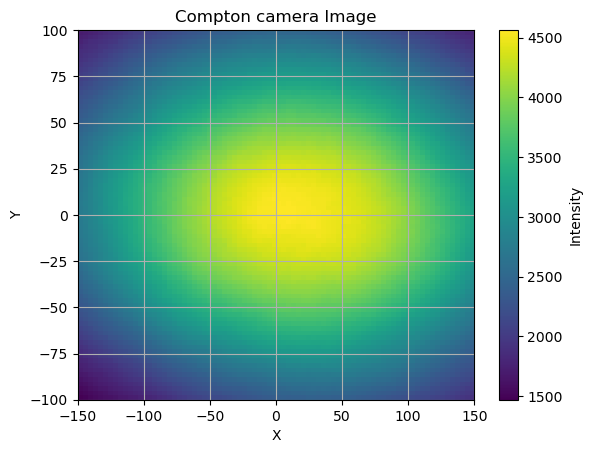

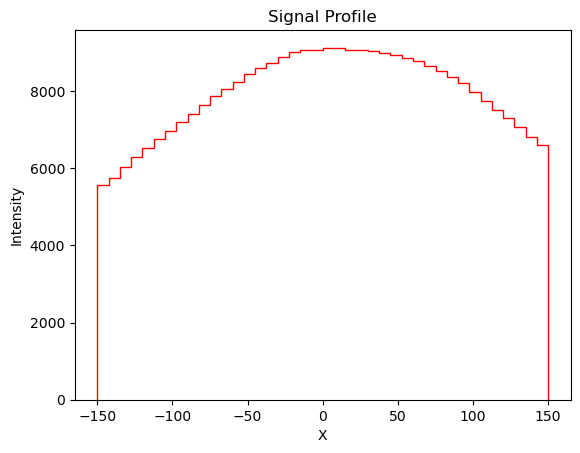

In [96]:

# Filter rows where processName is "annihil"
filtered_df2 = merged_df

num_conics_to_draw = 10000000  # Adjust as needed
plot_conics(filtered_df2, num_conics_to_draw)